In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
df = pd.read_csv('analysis.csv')

In [26]:
df.shape

(3554, 18)

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [28]:
latlong_df = pd.read_csv('coordinates.csv')

In [29]:
latlong_df['latitude'] = latlong_df['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')
latlong_df['longitude'] = latlong_df['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [30]:
latlong_df.sample()

,sector,coordinates,latitude,longitude
118,sector 107,"28.5052° N, 76.9729° E",28.5052,76.9729


In [31]:
new_df = df.merge(latlong_df,on='sector')

In [32]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [33]:
new_df['sector'] = new_df['sector'].astype(str)
print(new_df['sector'].dtype)
print(new_df['sector'].apply(type).unique())

object
[<class 'str'>]


In [34]:
group_df = new_df.groupby('sector')[['price','price_per_sqft','built_up_area','longitude','latitude']].mean()

In [35]:
group_df.head()

,price,price_per_sqft,built_up_area,longitude,latitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,77.0210,28.4484
manesar,0.962258,4608.064516,2027.367742,76.9428,28.3515
sector 1,1.860000,8249.833333,2327.833333,76.9456,28.3663
sector 10,2.092857,11866.571429,1908.857143,77.0009,28.4537
sector 102,1.696636,10603.822430,1556.130841,76.9715,28.4750


In [36]:
group_df.shape

(101, 5)

In [37]:
print(new_df.dtypes)

property_type       object
society             object
sector              object
price              float64
price_per_sqft     float64
bedRoom            float64
bathroom           float64
balcony             object
floorNum           float64
agePossession       object
built_up_area      float64
study room         float64
servant room       float64
store room         float64
pooja room         float64
others             float64
furnishing_type    float64
luxury_score       float64
coordinates         object
latitude           float64
longitude          float64
dtype: object


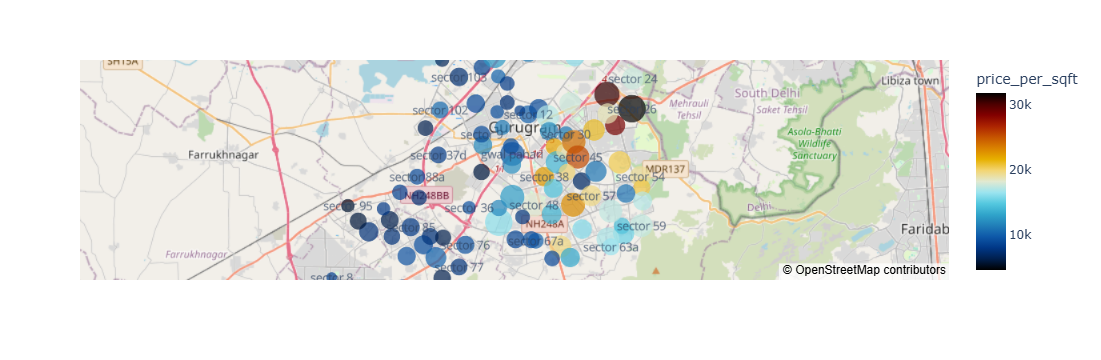

In [52]:
fig = px.scatter_mapbox(group_df,lat = 'latitude',lon = 'longitude',color='price_per_sqft',size='built_up_area',
                       color_continuous_scale = px.colors.cyclical.IceFire,zoom = 10,
                       mapbox_style = 'open-street-map',text=group_df.index)
fig.show()

In [39]:
new_df.to_csv('data_viz1.csv',index = False)

In [40]:
df1 = pd.read_csv('properties.csv')

In [41]:
df1.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']"
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']"
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F..."
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'..."


In [43]:
print(df.columns)

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')


In [44]:
print(df1.columns)

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features'],
      dtype='object')


In [46]:
worldcloud_df = df1[['features']].merge(df[['sector']], left_index=True, right_index=True, how="left")

In [47]:
worldcloud_df

,features,sector
0,"['Lift(s)', 'Park']",sector 36
1,"['Power Back-up', 'Intercom Facility', 'Lift(s...",sector 89
2,"['Intercom Facility', 'Lift(s)', 'Park']",sohna road
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 92
4,"['Centrally Air Conditioned', 'Water purifier'...",sector 102
...,...,...
3798,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",NaN
3799,"['Water purifier', 'Centrally Air Conditioned'...",NaN
3800,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN
3801,"['Private Garden / Terrace', 'Water purifier',...",NaN


In [48]:
import ast
main = []
for item in worldcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [49]:
main

['Lift(s)',
 'Park',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',

In [54]:
from wordcloud import WordCloud

In [55]:
feature_text = ' '.join(main)

In [56]:
import pickle
pickle.dump(feature_text,open('feature_text.pkl','wb'))

In [57]:
feature_text

'Lift(s) Park Power Back-up Intercom Facility Lift(s) Swimming Pool Park Piped-gas Internet/wi-fi connectivity Fitness Centre / GYM Club house / Community Center Intercom Facility Lift(s) Park Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaas

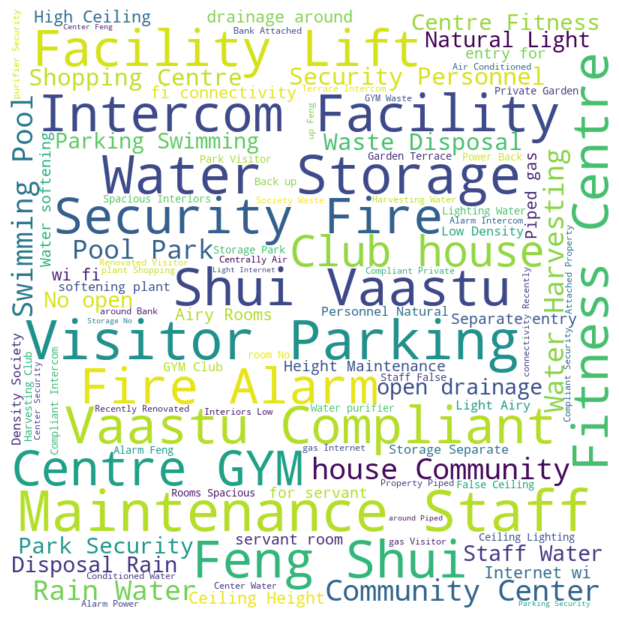

In [68]:
plt.rcParams["font.family"] = "Arial"
wordcloud = WordCloud(width = 800,height = 800,
                     background_color = 'white',
                     stopwords = set(['s']),
                     min_font_size = 10).generate(feature_text)
plt.figure(figsize = (6,6),facecolor = None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

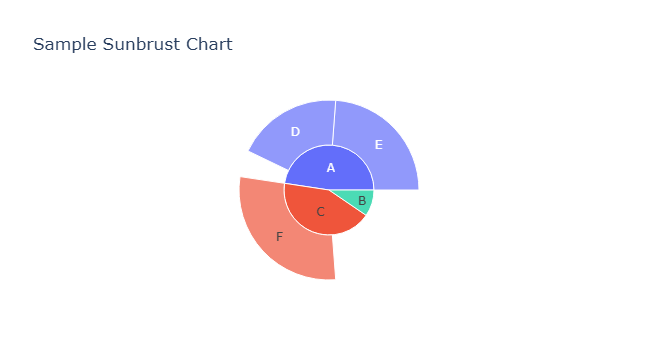

In [70]:
df1 = pd.DataFrame({
    'property_type': ['A', 'B', 'C', 'D', 'E', 'F'],
    'bedRoom': ["", "", "", "A", "A", "C"],
    'price_per_sqft': [10, 20, 30, 40, 50, 60]
})

df1['bedRoom'] = df1['bedRoom'].astype(str)
df1['price_per_sqft'] = df1['price_per_sqft'].astype(float)

fig = px.sunburst(
    df1,
    names = 'property_type',
    values = 'price_per_sqft',
    parents = 'bedRoom',
    title = "Sample Sunbrust Chart"
)
fig.show()

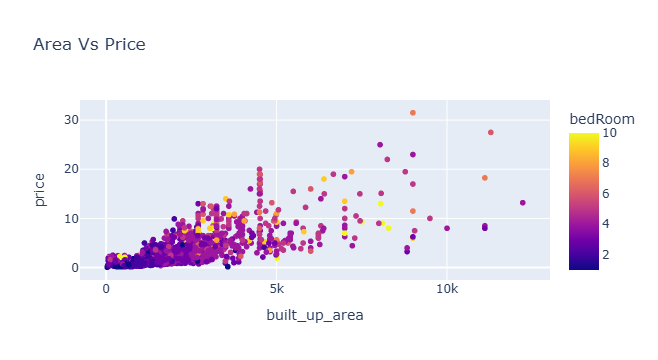

In [71]:
fig = px.scatter(df,x="built_up_area",y="price",color = "bedRoom",title = "Area Vs Price")
fig.show()

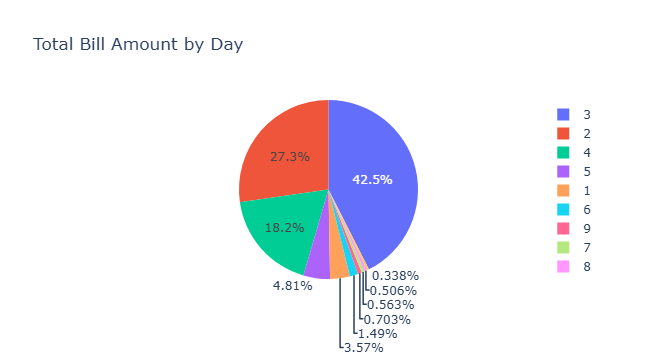

In [72]:
fig = px.pie(df,names = 'bedRoom',title = 'Total Bill Amount by Day')
fig.show()

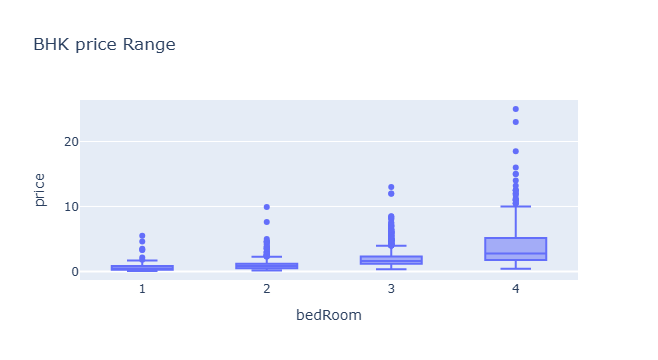

In [73]:
temp_df = df[df['bedRoom']<=4]
fig = px.box(temp_df,x = 'bedRoom',y='price',title = 'BHK price Range')
fig.show()

C:\Users\debas\AppData\Local\Temp\ipykernel_22156\3681406547.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\debas\AppData\Local\Temp\ipykernel_22156\3681406547.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

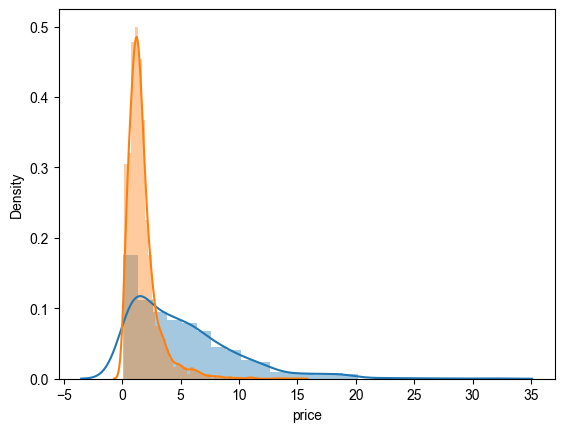

In [75]:
sns.distplot(df[df['property_type']=='house']['price'])
sns.distplot(df[df['property_type']=='flat']['price'])

In [76]:
new_df['sector'].unique().tolist().insert(0,'overall')